In [1]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt

# ЗАДАЧА


In [49]:
class trajectory:
    def __init__(self, angle, speed, u):
        self.angle0 = angle
        self.speed0 = speed
        self.u = u
        
    def calculate_initial(self):
        return self.angle0 - self.speed0**2/(2*self.u)
    def calculate_trajectory(self):
        phi01 = self.calculate_initial()
        return lambda w: phi01 - w**2/(2*self.u)

In [82]:
tr0 = trajectory(0, 0, 20)
tr1 = trajectory(5, 0, 20)
tr2 = trajectory(0, 5, 20)
tr3 = trajectory(0, 5, -20)
tr4 = trajectory(0, 50, -50)

In [9]:
mult = lambda x: x*2

In [18]:
list(map(mult, [2, 3, 4]))

[4, 6, 8]

In [19]:
y = lambda x: np.sin(x)

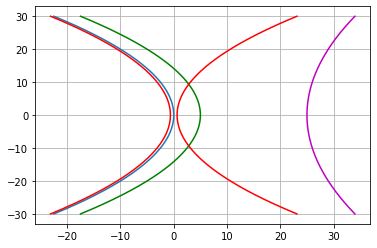

In [83]:
fig1, (ax1) = plt.subplots(1)

x = np.linspace(-30, 30,1000)
y0 = tr0.calculate_trajectory() 
y1 = tr1.calculate_trajectory() 
y2 = tr2.calculate_trajectory() 
y3 = tr3.calculate_trajectory() 
y4 = tr4.calculate_trajectory() 
ax1.plot(y0(x), x)
ax1.plot(y1(x), x, color='g')
ax1.plot(y2(x), x, color='r')
ax1.plot(y3(x), x, color='r')
ax1.plot(y4(x), x, color='m')
ax1.grid(True)
plt.show()